## Q-LEARNING GAME

### Ejemplo MUY sencillo de Q-learning en Python
Implementación muy simple de q-learning en Python.    
El código está versionado de la entrada del blog de Mic Getting "AI smarter with Q-learning: a simple first step in Python" (http://firsttimeprogrammer.blogspot.com/2016/09/getting-ai-smarter-with-q-learning.html#google_vignette).


In [1]:
import numpy as np
import pylab as plt

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

Se crea un mapa de lista de puntos que representa cada dirección que puede tomar un bot. Usar este formato permite crear fácilmente gráficos complejos pero también visualizarlo todo fácilmente con gráficos networkx.   

Nuestro punto de partida es 0, nuestro punto de meta es 7.

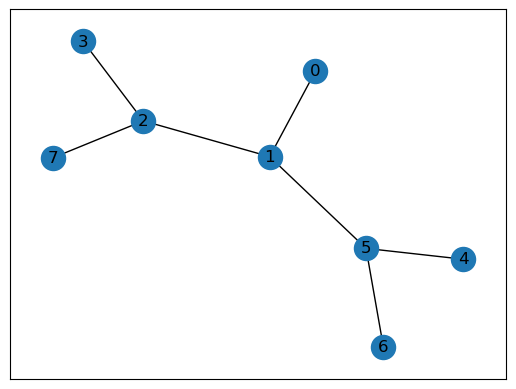

In [2]:
goal = 7

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

El mapa muestra que el punto 0 es donde nuestro robot comenzará su viaje y el punto 7 es su objetivo final. Los puntos añadidos y los caminos falsos son los obstáculos a los que tendrá que enfrentarse el robot. Si nos fijamos en la imagen superior, podemos tejer una historia en esta búsqueda: nuestro robot busca miel, intenta encontrar la colmena y evitar la fábrica (la historia cobrará sentido en la segunda parte del artículo).

A continuación, creamos el gráfico de recompensas, que es la versión matricial de nuestro mapa de listas de puntos. Inicializamos la matriz para que sea la altura y anchura de nuestra lista de puntos (8 en este ejemplo) e inicializamos todos los valores a -1:

In [3]:
# Cantidad de puntos en el gráfico? x puntos
MATRIX_SIZE = 8

# creación de matriz x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

Seguidamente, cambiamos los valores para que sean 0 si es un camino viable y 100 si es un camino objetivo

In [6]:
# asignación de ceros a los caminos y 100 al punto de llegada al objetivo
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # inverso del punto
        R[point[::-1]]= 0

# añadir punto de meta ida y vuelta
R[goal,goal]= 100

R=np.matrix([[  -1.,    0.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
        [   0.,   -1.,    0.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,   -1.,    0.,   -1.,   -1.,   -1.,  100.],
        [  -1.,   -1.,    0.,   -1.,   -1.,   -1.,   -1.,   -1.],
        [  -1.,   -1.,   -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,   -1.,   -1.,    0.,   -1.,    0.,   -1.],
        [  -1.,   -1.,   -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,   -1.,    0.,   -1.,   -1.,   -1.,   -1.,  100.]])

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


Para leer la matriz anterior, el eje y es el estado o dónde se encuentra actualmente tu bot, y el eje x son sus posibles próximas acciones. A continuación, construimos nuestra matriz de aprendizaje Q, que contendrá todas las lecciones aprendidas de nuestro bot. El modelo Q-learning utiliza una fórmula de reglas de transición y gamma es el parámetro de aprendizaje (ver Deep Q Learning for Video Games - The Math of Intelligence #9 para más detalles). El resto de este ejemplo está copiado en su mayor parte de la entrada del blog de Mic Getting AI smarter with Q-learning: a simple first step in Python.

In [7]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)
    
update(initial_state, action, gamma)


max_value 0.0


C:\Users\Jordi\AppData\Local\Temp\ipykernel_18148\1479312831.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act,1))
C:\Users\Jordi\AppData\Local\Temp\ipykernel_18148\1479312831.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))


0

Seguimos el blog de Mic y ejecutamos las funciones de entrenamiento y prueba que ejecutarán la función de actualización 700 veces permitiendo al modelo Q-learning averiguar el camino más eficiente:

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 100.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 180.0
Score: 155.55555555555554
max_value 0.0
Score: 155.55555555555554
max_value 144.0
Score: 235.55555555555554
max_value 144.0
Score: 235.55555555555554
max_value 0.0
Score: 235.55555555555554
max_value 0.0
Score: 235.55555555555554
max_value 180.0
Score: 280.0
max_value 0.0
Score: 280.0
max_value 0.0
Score: 280.0
max_value 244.0
Score: 232.78688524590163
max_value 0.0
Score: 232.78688524590163
max_value 0.0
Score: 232.78688524590163
max_value 0.0
Score: 232.78688524590163
max_value 244.0
Score: 259.0163934426229
max_value 0.0
Score: 259.0163934426229
max_value 195.20000000000002
Score: 280.0
max_value 195.20000000000002
Score: 280.0
max_value 195.20000000000002
Score: 280.0
max_value 195.20000000000002
Score: 280.0
max_value 195.20000000000002
Score: 36

C:\Users\Jordi\AppData\Local\Temp\ipykernel_18148\1479312831.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act,1))
C:\Users\Jordi\AppData\Local\Temp\ipykernel_18148\1479312831.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))
C:\Users\Jordi\AppData\Local\Temp\ipykernel_18148\1479312831.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max

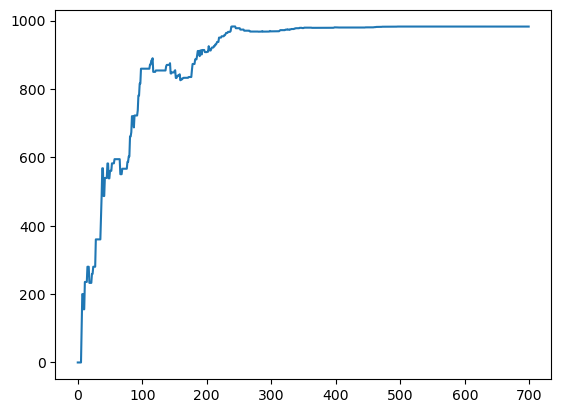

In [8]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

Vemos que el modelo encontró correctamente el camino más eficiente desde el nodo inicial 0 hasta el nodo objetivo 7 y tardó unas 400 iteraciones en converger a una solución.